# Make Nice Plots Used Reduced Outputs

- Run using python 3.9
- If a package is not installed do `!{sys.executable} -m pip install <module>`

In [1]:
import sys, os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d  
import scipy
import pickle 
import uproot
print(uproot.__version__)

5.1.2


In [2]:
## -------------------------------- ##
##        SET PLOTTING STYLE        ##
## -------------------------------- ##
matplotlib.rcParams['figure.figsize'] = 8.5,6
matplotlib.rcParams['figure.subplot.left'] = 0.15
matplotlib.rcParams['figure.subplot.right'] = 0.88
matplotlib.rcParams['figure.subplot.bottom'] = 0.15
matplotlib.rcParams['figure.subplot.top'] = 0.88
matplotlib.rcParams['axes.titlesize'] = 20
matplotlib.rcParams['axes.labelsize'] = 18
matplotlib.rcParams['axes.labelweight'] = 'normal'
matplotlib.rcParams['font.weight'] = 'normal' 
matplotlib.rcParams['font.family'] = 'serif'
matplotlib.rcParams['font.serif'] = 'Times New Roman'
matplotlib.rcParams['mathtext.fontset'] = 'cm'
matplotlib.rcParams['lines.linewidth'] = 2
matplotlib.rcParams['lines.markersize'] = 10
matplotlib.rcParams['xtick.labelsize'] = 16
matplotlib.rcParams['ytick.labelsize'] = 16
matplotlib.rcParams['xtick.major.size'] = 8
matplotlib.rcParams['ytick.major.size'] = 8
matplotlib.rcParams['xtick.minor.size'] = 4
matplotlib.rcParams['ytick.minor.size'] = 4
matplotlib.rcParams['xtick.minor.visible'] = True 
matplotlib.rcParams['ytick.minor.visible'] = True
matplotlib.rcParams['xtick.direction'] = 'in' 
matplotlib.rcParams['ytick.direction'] = 'in' 
matplotlib.rcParams['xtick.top'] = True 
matplotlib.rcParams['ytick.right'] = True
matplotlib.rcParams['xtick.major.pad'] = 6
matplotlib.rcParams['image.cmap'] = 'viridis'

In [3]:
## ----------------------------------------- ##
##       READ IN DICTS TO MAKE PLOTS         ##
## ----------------------------------------- ##

with open('../Data/Pb212_decay_Exits_1cmMaxStep_3umNanosphere_data.pkl', 'rb') as inFile:
#with open('../Data/Gamma_exits_1keV100keV_3umSphere_1cmMaxStep_data.pkl', 'rb') as inFile:
    dictList = pickle.load(inFile)

inFile.close()

nEvents = len(dictList['primaryParticleEnergy'])
print(nEvents, 'events in file')

100000 events in file


In [4]:
## ----------------------------------------- ##
##  PROCESS DICTIONARY OF EXITING PARTICLES  ##
## ----------------------------------------- ##

doPlot = False
eventToPlot = 69
stepLength = 10.
color_list = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan', 'gold', 'gray', 'gray']
color_dict = {'nu_e':'blue', 'anti_nu_e':'cyan', 'gamma':'green', 'e-':'red', 'alpha':'brown'}

NuEnergykeV = np.zeros(nEvents)
TotalEnergyExiting = np.zeros(nEvents)
TotalChargeExiting = np.zeros(nEvents)
TotalParticleExiting = np.zeros(nEvents)
TotalMomentumExitingMag  = np.zeros(nEvents)
TotalMomentumExiting = np.zeros((nEvents, 3))
TotalMomentumExiting_electron =  np.zeros((nEvents, 3))
TotalMomentumExiting_nu = np.zeros((nEvents, 3))
TotalMomentumExiting_gamma = np.zeros((nEvents, 3))
TotalMomentumExiting_ion = np.zeros((nEvents, 3))
TotalMomentumExiting_alpha = np.zeros((nEvents, 3))

## Loop through all events
for idx, exitDict in enumerate(dictList['nansphereExitParticles']):

    ## print process
    if idx % 10000 == 0:
        print('On Event', idx, '/', nEvents)

    if doPlot and idx == eventToPlot:
        ax = plt.figure(figsize=(8,8), dpi=200).add_subplot(projection='3d')
        counter = 0

    totalCharge = 0.
    totalParticle = 0.
    totalEnergy = 0.
    totMom, totMomX, totMomY, totMomZ = 0., 0., 0., 0.

    ## loop through exiting particles in event
    for trackID, [pName, pCharge, pEnergy, [pPosX, pPosY, pPosZ], [pMomX, pMomY, pMomZ]] in exitDict.items():

        totalCharge += pCharge
        totalParticle += 1
        totalEnergy += pEnergy

        totMomX += pMomX
        totMomY += pMomY
        totMomZ += pMomZ

        totMomParticle = np.sqrt(pMomX**2 + pMomY**2 + pMomZ**2)
        dirX = pMomX/totMomParticle
        dirY = pMomY/totMomParticle
        dirZ = pMomZ/totMomParticle

        TotalMomentumExiting[idx][0] += pMomX
        TotalMomentumExiting[idx][1] += pMomY
        TotalMomentumExiting[idx][2] += pMomZ

        if pName == 'e-':
            TotalMomentumExiting_electron[idx][0] += pMomX
            TotalMomentumExiting_electron[idx][1] += pMomY
            TotalMomentumExiting_electron[idx][2] += pMomZ
        elif pName == 'nu_e' or pName == 'anti_nu_e':
            TotalMomentumExiting_nu[idx][0] += pMomX
            TotalMomentumExiting_nu[idx][1] += pMomY
            TotalMomentumExiting_nu[idx][2] += pMomZ
            NuEnergykeV[idx] = pEnergy
        elif pName == 'gamma':
            TotalMomentumExiting_gamma[idx][0] += pMomX
            TotalMomentumExiting_gamma[idx][1] += pMomY
            TotalMomentumExiting_gamma[idx][2] += pMomZ
        elif pName.find('Pb212') != -1:
            TotalMomentumExiting_ion[idx][0] += pMomX
            TotalMomentumExiting_ion[idx][1] += pMomY
            TotalMomentumExiting_ion[idx][2] += pMomZ
        elif pName.find('alpha') != -1:
            TotalMomentumExiting_alpha[idx][0] += pMomX
            TotalMomentumExiting_alpha[idx][1] += pMomY
            TotalMomentumExiting_alpha[idx][2] += pMomZ
        else:
            print('no match for particle:', pName)

        ## plot each track in event
        if doPlot and idx == eventToPlot:
            pPosX_nm = pPosX*1e3
            pPosY_nm = pPosY*1e3
            pPosZ_nm = pPosZ*1e3
            print(totMomParticle)
            print(pPosX_nm, pPosY_nm, pPosZ_nm)
            print((pPosX_nm + dirX*stepLength), (pPosY_nm + dirY*stepLength), (pPosZ_nm + dirZ*stepLength))
            ax.quiver(pPosX_nm, pPosY_nm, pPosZ_nm, (pPosX_nm + dirX*stepLength), (pPosY_nm + dirY*stepLength), (pPosZ_nm + dirZ*stepLength), 
                      length = totMomParticle/1e5, arrow_length_ratio=0.1, lw=2, color=color_dict[pName], label= pName)
            counter += 1
            
        ## Done looping through tracks in events

    ## tabulate totals
    totMom = np.sqrt(totMomX**2 + totMomY**2 +  totMomZ**2)
    TotalMomentumExitingMag[idx] = totMom
    TotalChargeExiting[idx] = totalCharge
    TotalParticleExiting[idx] = totalParticle
    TotalEnergyExiting[idx] = totalEnergy

    ## format plots
    if doPlot and idx == eventToPlot:
        u, v = np.mgrid[0:2*np.pi:10j, 0:np.pi:10j]
        x = np.cos(u)*np.sin(v)*100
        y = np.sin(u)*np.sin(v)*100
        z = np.cos(v)*100
        ax.plot_wireframe(x, y, z, lw = 1, alpha=0.8, color="slategray", label='nanosphere')
        ax.set_xlabel('X [nm]')
        ax.set_ylabel('Y [nm]')
        ax.set_zlabel('Z [nm]')

        ax.set_xlim(-200,200)
        ax.set_ylim(-200,200)
        ax.set_zlim(-200,200)
        ax.legend(frameon=False, loc='upper left', fontsize=12)
        plt.tight_layout()
    ## Done looping through events

## Calculate magintude of neutrino, gamma, e-, and ion exit momentum
TotalMomentumExitingMag_electron = np.sqrt(TotalMomentumExiting_electron[:,0]**2 + 
                                           TotalMomentumExiting_electron[:,1]**2 + 
                                           TotalMomentumExiting_electron[:,2]**2 )

TotalMomentumExitingMag_nu = np.sqrt(TotalMomentumExiting_nu[:,0]**2 + 
                                     TotalMomentumExiting_nu[:,1]**2 + 
                                     TotalMomentumExiting_nu[:,2]**2 )

TotalMomentumExitingMag_gamma = np.sqrt(TotalMomentumExiting_gamma[:,0]**2 + 
                                        TotalMomentumExiting_gamma[:,1]**2 + 
                                        TotalMomentumExiting_gamma[:,2]**2 )

TotalMomentumExitingMag_ion = np.sqrt(TotalMomentumExiting_ion[:,0]**2 + 
                                       TotalMomentumExiting_ion[:,1]**2 + 
                                       TotalMomentumExiting_ion[:,2]**2 )
TotalMomentumExitingMag_alpha = np.sqrt(TotalMomentumExiting_alpha[:,0]**2 + 
                                       TotalMomentumExiting_alpha[:,1]**2 + 
                                       TotalMomentumExiting_alpha[:,2]**2 )

On Event 0 / 100000
On Event 10000 / 100000
On Event 20000 / 100000
On Event 30000 / 100000
On Event 40000 / 100000
On Event 50000 / 100000
On Event 60000 / 100000
On Event 70000 / 100000
On Event 80000 / 100000
On Event 90000 / 100000


[0. 0. 0. ... 0. 0. 0.]
(array([], dtype=int64),)


Text(0.5, 0, 'Beta Energy [keV]')

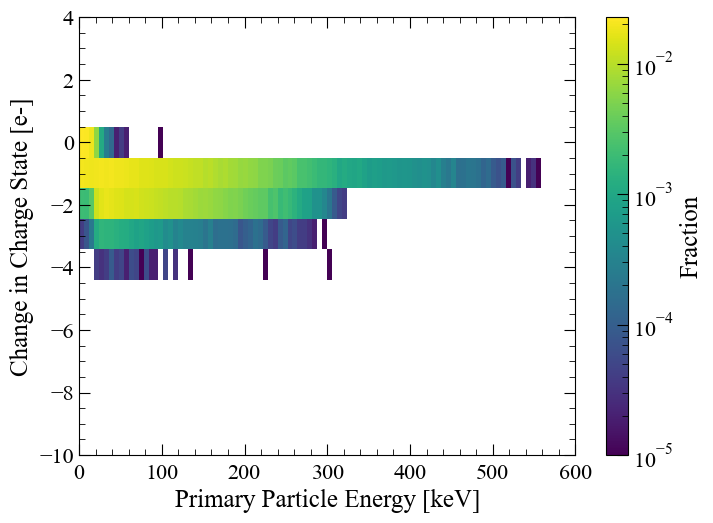

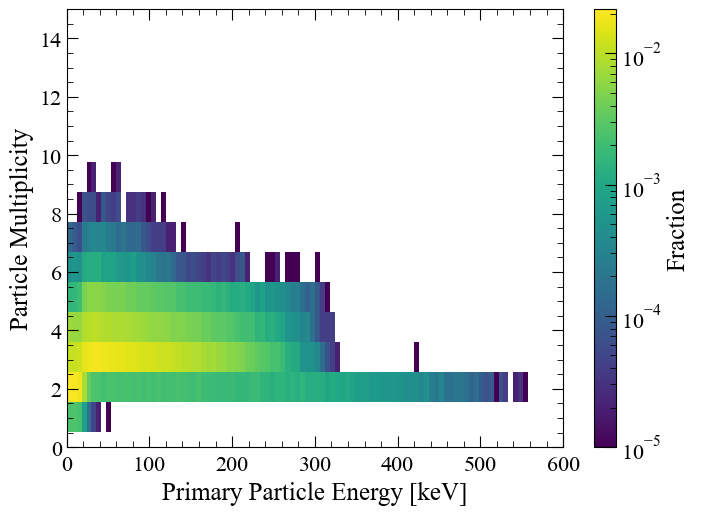

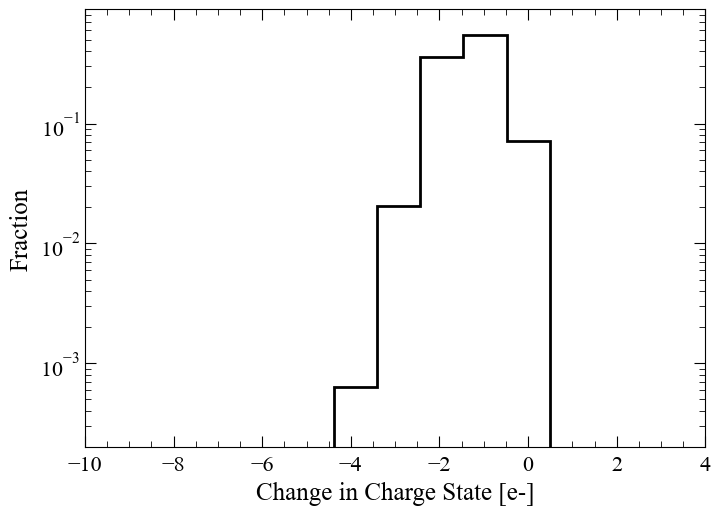

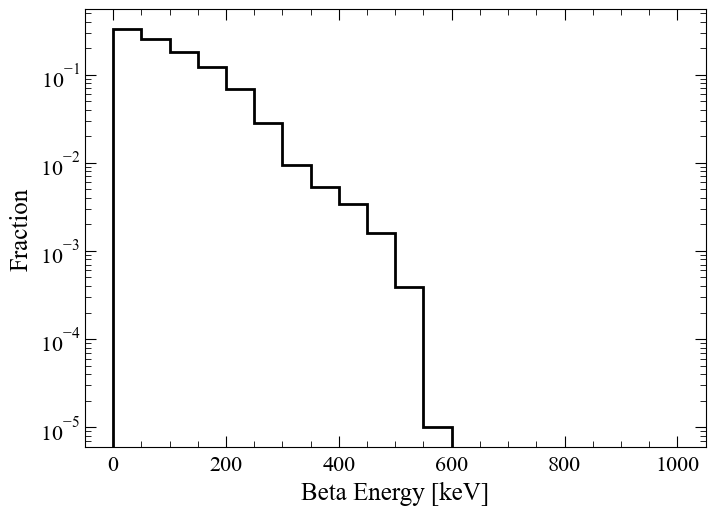

In [22]:
## ----------------------------------------- ##
##      CHARGE STATE CHANGE VS ENERGY        ##
## ----------------------------------------- ##

#dictList['primaryParticleEnergy']
#dictList['exitParticleCharge']
#dictList['exitParticleMultiplicity']
#electron_energy = dictList['DecayProgeny']['e-']

print(TotalMomentumExitingMag_alpha)
print(np.where(TotalMomentumExitingMag_alpha > 10.))

primaryBetaEnergy = np.zeros(nEvents)
for idx, decayProgeny in enumerate(dictList['DecayProgeny']):
    total_electronEnergy = 0.
    for trackID, [particleName, particleEnergy, particleMomentum] in decayProgeny.items():
        if particleName == 'e-':
            primaryBetaEnergy[idx] += particleEnergy

## Particle Energy vs Change in charge state
fig, ax = plt.subplots(1,1, dpi=100)

# TotalChargeExiting
h2 = ax.hist2d(primaryBetaEnergy, TotalChargeExiting, #dictList['exitParticleCharge'],
           bins=[100,41], range=[[0,600],[-20,20]],
           weights= [1/float(nEvents) for i in range(nEvents)],
           #cmin = , cmax = ,
           cmap='viridis', norm = matplotlib.colors.LogNorm()
          )

ax.set_ylim(-10,4)
ax.set_xlabel('Primary Particle Energy [keV]')
ax.set_ylabel('Change in Charge State [e-]')
cb = fig.colorbar(h2[3],ax=ax)
cb.set_label('Fraction')

## Particle Energy vs Particle Exit Mulitplicity
fig, ax = plt.subplots(1,1, dpi=100)

# TotalParticleExiting
h2 = ax.hist2d(primaryBetaEnergy, TotalParticleExiting, #dictList['exitParticleMultiplicity'],
          bins=[100,20], range=[[0,600],[-0.5,20]],
          weights= [1/float(nEvents) for i in range(nEvents)],
           #cmin = , cmax = ,
           cmap='viridis', norm = matplotlib.colors.LogNorm()
          )

ax.set_ylim(0,15)
ax.set_xlabel('Primary Particle Energy [keV]')
ax.set_ylabel('Particle Multiplicity')
cb = fig.colorbar(h2[3],ax=ax)
cb.set_label('Fraction')

## Exit particle Charge 1D spectra
fig, ax = plt.subplots(1,1, dpi=100)

ax.hist(TotalChargeExiting, #dictList['exitParticleCharge'],
          bins=41, range=[-20,20], 
          histtype='step', color='black', lw=2, align='mid',
          weights= [1/float(nEvents) for i in range(nEvents)],
          )

ax.set_xlim(-10,4)
ax.set_yscale('log')
ax.set_ylim(2e-4,0.9)
ax.set_ylabel('Fraction')
ax.set_xlabel('Change in Charge State [e-]')

## Beta Energy Spectra
fig, ax = plt.subplots(1,1, dpi=100)

ax.hist(primaryBetaEnergy, #dictList['primaryParticleEnergy'],
          bins=20, range=[0,1000], 
          histtype='step', color='black', lw=2, align='mid',
          weights= [1/float(nEvents) for i in range(nEvents)],
          )

ax.set_yscale('log')
ax.set_ylabel('Fraction')
ax.set_xlabel('Beta Energy [keV]')